# Using Metrics for Classification

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn.datasets as skdt
iris = skdt.load_iris()
X = iris.data
y = iris.target

In [3]:
print(f'{type(X)=}, {type(y)=}')

type(X)=<class 'numpy.ndarray'>, type(y)=<class 'numpy.ndarray'>


In [4]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
y[:5]

array([0, 0, 0, 0, 0])

In [6]:
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['target_names'] = df_iris['target'].map({i:name for i, name in enumerate(iris.target_names)})

display(df_iris.head(5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Split Train / Test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Models

### Logistic Regression

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

### Decision Tree

In [9]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Check Accuracy

In [10]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dec_tree = dec_tree.predict(X_test)

acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
acc_dec_tree = accuracy_score(y_test, y_pred_dec_tree)

print(f'Accuracy for\nLogistic Regression = {acc_log_reg}\nDecision Tree = {acc_dec_tree}')

Accuracy for
Logistic Regression = 1.0
Decision Tree = 1.0


### Precision & Recall Check

In [12]:
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')

precision_dec_tree = precision_score(y_test, y_pred_dec_tree, average='weighted')
recall_dec_tree = recall_score(y_test, y_pred_dec_tree, average='weighted')

print(f'Precision ==> Logistic Regression = {precision_log_reg} & Decision Tree = {precision_dec_tree}')
print(f'Recall    ==> Logistic Regression = {recall_log_reg} & Decision Tree = {recall_dec_tree}')

Precision ==> Logistic Regression = 1.0 & Decision Tree = 1.0
Recall    ==> Logistic Regression = 1.0 & Decision Tree = 1.0


### F1 (Harmonic Mean Test)

In [14]:
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')
f1_dec_tree = f1_score(y_test, y_pred_dec_tree, average='weighted')

print(f'F1 score ==> Logistic Regression = {f1_log_reg} & Decision Tree = {f1_dec_tree}')

F1 score ==> Logistic Regression = 1.0 & Decision Tree = 1.0


### Confusion Matrix

In [18]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_dec_tree = confusion_matrix(y_test, y_pred_dec_tree)

print(f'Confusion Matrix ==>\nLogistic Regression =\n{cm_log_reg}\nDecision Tree =\n{cm_dec_tree}')

Confusion Matrix ==>
Logistic Regression =
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Decision Tree =
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


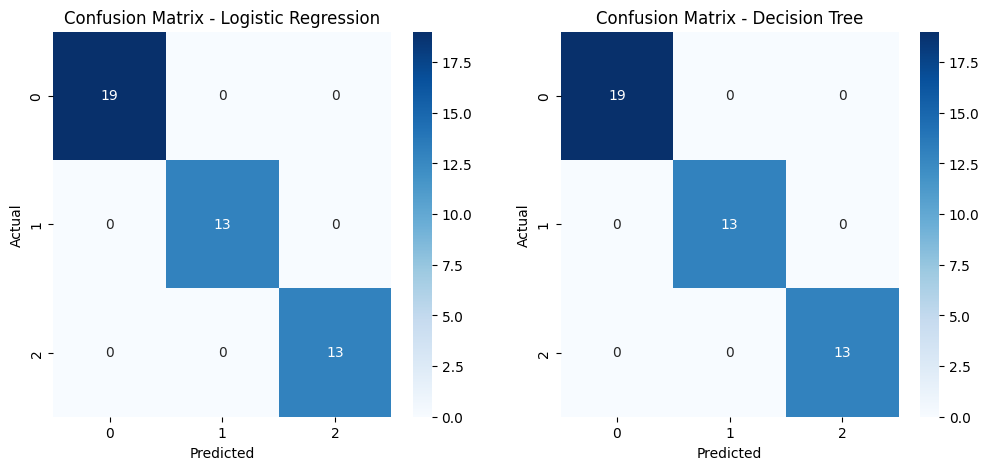

In [24]:
# Plot the Confusion Matrix

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix - Logistic Regression')

sns.heatmap(cm_dec_tree, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix - Decision Tree')

plt.tight_layout
plt.show();